In [24]:
import face_recognition

In [36]:
!pip install tqdm

In [37]:
from tqdm import trange, notebook  

In [25]:
print(face_recognition.__version__)

1.2.3


In [26]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img

In [27]:
import matplotlib.font_manager
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
[matplotlib.font_manager.FontProperties(fname=font).get_name() for font in font_list if 'Nanum' in font]


['NanumMyeongjo',
 'NanumBarunGothic',
 'NanumSquareRound',
 'NanumSquare',
 'NanumMyeongjo',
 'NanumGothic',
 'NanumSquare',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumSquareRound']

In [28]:
import matplotlib as mpl
plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False

한글도 잘 출력되게 폰트 지정해줬습니당

In [29]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    return cropped_face

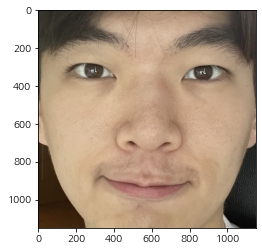

In [96]:
image_path = os.getenv('HOME')+'/aiffel/나와 닮은 연예인 찾기/data/한기혁2.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

ㅋㅋ..^^ 크롭도 되면서, 임베딩 벡터 변환도 되는 사진을 찾느라 여러 개 찍어 보다가 3장을 건질 수 있었습니다

(크롭도 안 되어서 list out of range가 뜬 사진도 있었고,
crop은 잘 되었지만 face_encodings가 안 먹어서 embedding이 빈 리스트로 나오는 사진도 있었어요). 

표정도 이리저리 해봤지만 아무래도 조명을 이리저리 움직이는 게 가장 효과적이었습니다.

In [76]:
dir_path = os.getenv('HOME')+'/aiffel/나와 닮은 연예인 찾기/data'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['러블리즈지수.jpeg', '강민경.jpg', '대도서관.jpeg', '김민재.jpeg', '김윤석.jpeg', 'RM.jpg', '무라니시.png', '길.jpg', '딕헌터.jpeg', '강미나.jpg', '홍구.jpg', '민니.jpg', '김상호.png', '박신양.png', '개리.jpg', '김연우.jpeg', '화사.jpg', '러블리즈예인.jpg', '리암 니슨.png', '한기혁3.jpg', '강동원.jpg', '김래원.jpeg', '고창석.jpeg', '박보검.jpg', '김대명.jpeg', 'obama.jpg', '문재인.jpeg', '돈스파이크.jpg', '박건우.png', '공효진.jpg', '김대중.jpg', '김학범.jpg', '박용택.jpg', '김희철.jpg', '문별.jpg', '공유.jpg', 'biden.jpg', '도아.jpeg', '효정.jpg', '김종서.jpg', '김경진.png', '매드클라운.jpeg', '류승룡.jpeg', '목진화.png', '박재범.jpg', '김유정.jpg', '박서준.jpeg', '류준열.jpg', '기성용.jpg', '마크 러팔로.jpeg', '김C.jpeg', '김현수.jpeg', '나인뮤지스경리.jpg', '로다주.jpeg', '다니엘 크레이그.jpeg', '미미.jpg', '한기범.jpg', '김남주.jpeg', 'trump.jpg', '한기혁2.jpg', '레드벨벳웬디.jpg', '노홍철.jpeg', '마동석.jpeg', '황병국.jpg', '권태원.jpeg', '로제.jpg', '.ipynb_checkpoints', '한석규.jpg', '개코.jpeg', '황정민.jpg', '류진.jpg', '하현우.jpg', '리아.jpg', 'bush.jpeg', '박성호.jpg', '김광현.jpg', '로저 무어.jpeg', '박명수.jpg', '레인보우재경.jpg', '리사.jpg', '한기혁1.jpg', '김영삼.jpeg', '김고은.jpeg', '한효주.jpg',

In [97]:
image_file = os.path.join(dir_path, '한기혁3.jpg')
face = get_cropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face, num_jitters=100, model="large")

embedding = get_face_embedding(face)  
len(embedding)

1

In [77]:
def get_face_embedding_dict(dir_path):
    file_list = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]
    embedding_dict = {}

    for file in notebook.tqdm(file_list):
        img_path = os.path.join(dir_path, file)
        print(img_path)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
    return embedding_dict

20~30분은 소요되길래 그냥 주피터 노트북 (\*)만 보고 멍 때리고 있기 힘들어서 진행상황을 나타내주는 tqdm 라이브러리 써봤습니다.

isdirectory error가 계속 나서 isfile 통해서 directory가 아닌 file만 file_list에 담아 처리했습니다.

In [78]:
embedding_dict = get_face_embedding_dict(dir_path)

  0%|          | 0/99 [00:00<?, ?it/s]

/aiffel/aiffel/나와 닮은 연예인 찾기/data/러블리즈지수.jpeg
/aiffel/aiffel/나와 닮은 연예인 찾기/data/강민경.jpg
/aiffel/aiffel/나와 닮은 연예인 찾기/data/대도서관.jpeg
/aiffel/aiffel/나와 닮은 연예인 찾기/data/김민재.jpeg
/aiffel/aiffel/나와 닮은 연예인 찾기/data/김윤석.jpeg
/aiffel/aiffel/나와 닮은 연예인 찾기/data/RM.jpg
/aiffel/aiffel/나와 닮은 연예인 찾기/data/무라니시.png
/aiffel/aiffel/나와 닮은 연예인 찾기/data/길.jpg
/aiffel/aiffel/나와 닮은 연예인 찾기/data/딕헌터.jpeg
/aiffel/aiffel/나와 닮은 연예인 찾기/data/강미나.jpg
/aiffel/aiffel/나와 닮은 연예인 찾기/data/홍구.jpg
/aiffel/aiffel/나와 닮은 연예인 찾기/data/민니.jpg
/aiffel/aiffel/나와 닮은 연예인 찾기/data/김상호.png
/aiffel/aiffel/나와 닮은 연예인 찾기/data/박신양.png
/aiffel/aiffel/나와 닮은 연예인 찾기/data/개리.jpg
/aiffel/aiffel/나와 닮은 연예인 찾기/data/김연우.jpeg
/aiffel/aiffel/나와 닮은 연예인 찾기/data/화사.jpg
/aiffel/aiffel/나와 닮은 연예인 찾기/data/러블리즈예인.jpg
/aiffel/aiffel/나와 닮은 연예인 찾기/data/리암 니슨.png
/aiffel/aiffel/나와 닮은 연예인 찾기/data/한기혁3.jpg
/aiffel/aiffel/나와 닮은 연예인 찾기/data/강동원.jpg
/aiffel/aiffel/나와 닮은 연예인 찾기/data/김래원.jpeg
/aiffel/aiffel/나와 닮은 연예인 찾기/data/고창석.jpeg
/aiffel/aiffel/나와 닮은 연예인 찾기/data/박보검.jpg
/aif

In [79]:
copied_embedding_dict = embedding_dict.copy()

In [80]:
import json
# NumPy 배열을 리스트로 변환
converted_dict = {}
for key, value in copied_embedding_dict.items():
    if isinstance(value, np.ndarray):
        converted_dict[key] = value.tolist()
    else:
        converted_dict[key] = value

# JSON 파일로 저장
with open('embedding_dict_includingme.json', 'w') as file:
    json.dump(converted_dict, file)

In [ ]:
#import json

## JSON 파일로부터 로드
#with open('data.json', 'r') as file:
#    loaded_dict = json.load(file)

## 로드한 딕셔너리 사용
#print(loaded_dict['key1'])  # 출력: value1

embedding_dict를 받아내는 데 2~30분이나 소요되었기에 만든 걸 저장해놓고 쓸 수 있도록 딕셔너리를 복사해서 json파일로 만들기도 했습니다.

In [81]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)
get_distance('obama', 'trump')

0.8829724634730887

In [82]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('trump')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [83]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('trump',
  array([-1.59549206e-01,  1.76235348e-01,  4.42330427e-02,  7.82147702e-03,
         -6.17110953e-02,  3.74718904e-02,  6.93561286e-02, -1.47441730e-01,
          5.58791049e-02, -5.97111695e-02,  1.98946148e-01, -4.76544648e-02,
         -3.31725538e-01, -4.29827198e-02,  9.90410149e-03,  1.43209204e-01,
         -1.25464708e-01, -1.48628101e-01, -2.25920171e-01, -7.61741921e-02,
          1.48109673e-03,  6.27448335e-02, -8.26201215e-02, -2.57774126e-02,
         -8.61245245e-02, -2.51727492e-01, -1.65755413e-02, -1.12601548e-01,
          2.45826151e-02, -6.05519339e-02,  5.20646311e-02,  2.86762556e-03,
         -1.75037324e-01, -3.90097164e-02,  1.42796931e-03,  2.02671103e-02,
         -1.38952747e-01, -6.05770722e-02,  1.71319485e-01,  3.80713828e-02,
         -1.86237261e-01, -5.76614849e-02,  7.48737380e-02,  2.35783890e-01,
          1.57683000e-01, -1.38742207e-02,  8.51381477e-03, -9.25419182e-02,
          7.84723386e-02, -2.64181733e-01, -1.96655951e-02,  1.40

In [89]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x: sort_key_func(x[0]))

    fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # subplot 크기 조정
    fig.tight_layout(pad=2.0)  # subplot 간격 조정
    
    for i in range(top + 1):
        if i >= len(sorted_faces):
            break
        
        face_name = sorted_faces[i][0]
        face_distance = sort_key_func(face_name)
        
        for extension in ['.jpg', '.jpeg', '.png']:
            face_image_path = os.path.join(dir_path, face_name + extension)  # 이미지 파일 경로
            if os.path.exists(face_image_path):
                face_image = plt.imread(face_image_path)  # 이미지 파일 읽어오기
                break
        
        ax = axes[i // 3, i % 3]  # 서브플롯 위치 설정
        ax.imshow(face_image)  # 이미지 시각화
        ax.set_title('순위 {}: {}\n거리: {}'.format(i, face_name, face_distance))  # 서브플롯 제목 설정
        ax.axis('off')  # 축 표시하지 않음
    
    plt.show()

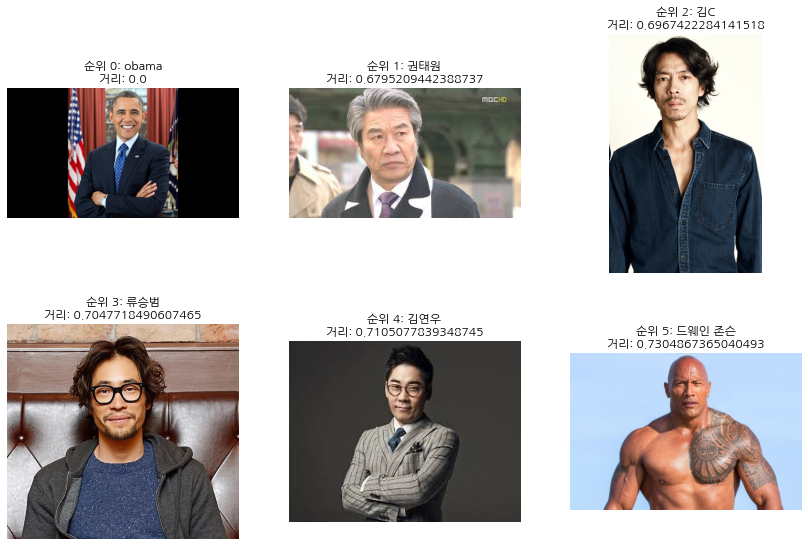

In [95]:
get_nearest_face('obama')

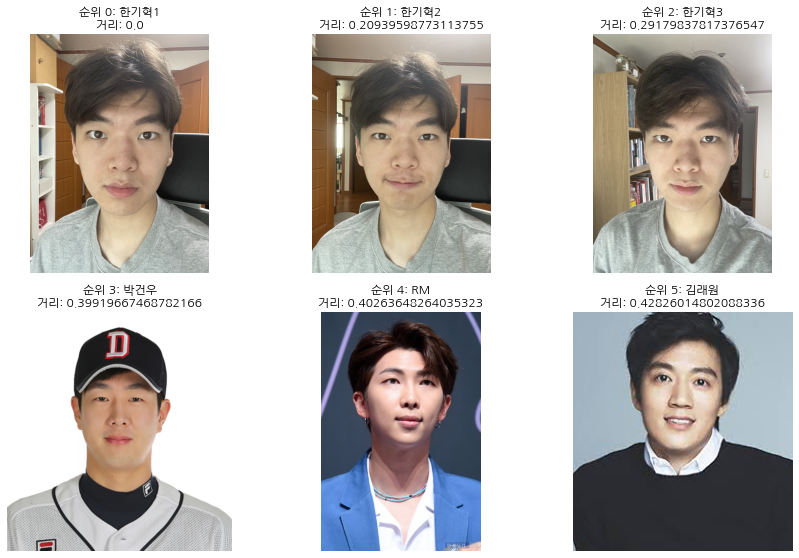

In [86]:
get_nearest_face('한기혁1')

In [98]:
def get_9nearest_face(name, top=11):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x: sort_key_func(x[0]))

    num_rows = (top + 1) // 3 + ((top + 1) % 3 > 0)  # subplot의 행 개수 계산
    fig, axes = plt.subplots(num_rows, 3, figsize=(12, 8))  # subplot 크기 조정
    fig.tight_layout(pad=2.0)  # subplot 간격 조정
    
    for i in range(top + 1):
        if i >= len(sorted_faces):
            break
        
        face_name = sorted_faces[i][0]
        face_distance = sort_key_func(face_name)
        
        for extension in ['.jpg', '.jpeg', '.png']:
            face_image_path = os.path.join(dir_path, face_name + extension)  # 이미지 파일 경로
            if os.path.exists(face_image_path):
                face_image = plt.imread(face_image_path)  # 이미지 파일 읽어오기
                break
        
        ax = axes[i // 3, i % 3]  # 서브플롯 위치 설정
        ax.imshow(face_image)  # 이미지 시각화
        ax.set_title('순위 {}: {}\n거리: {}'.format(i, face_name, face_distance))  # 서브플롯 제목 설정
        ax.axis('off')  # 축 표시하지 않음
    
    plt.show()

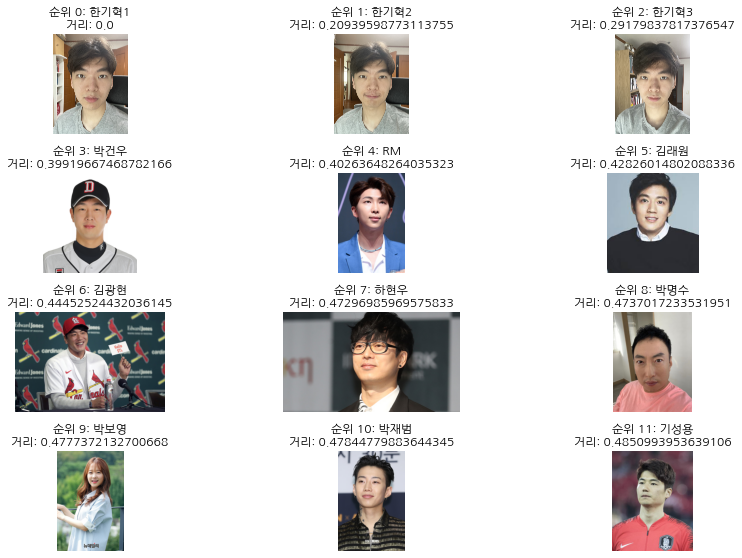

In [99]:
get_9nearest_face('한기혁1')

~~눈을 부릅 뜨면 face_recognition 측에서 잘 알아봐줄까 싶어 그렇게 했더랬죠.~~

코드를 조금 바꿔 순위와 거리, 사진까지 시각화되게 만들었습니다.